<a href="https://colab.research.google.com/github/Desatty/Mentorhub/blob/main/Mentorhub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Задание №1:
“MentorHub” — это сервис, который помогает менторам и менти найти друг друга. Встречи проходят на площадке сервиса. Назначить встречу можно в личном кабинете после авторизации на сайте.

Продакт-менеджер Иван начал подготовку к новому этапу развития приложения и попросил вас собрать данные о работе сервиса.

Изучите данные и подготовьте ответы на вопросы Ивана:

1. Какое количество менторов и менти взаимодействуют каждый месяц на нашей платформе? Как меняется этот показатель из месяца в месяц? Учитывайте все сессии в расчетах. Даже если сессия не состоялась, это показывает активность.
2. Сколько на платформе менторов и менти, которые еще не приняли участие ни в одной встрече? Учитывайте тех пользователей, кто ни разу не назначал себе встречи. Почему они не принимают участие во встречах? Какие
гипотезы можно проверить?
3. Сколько у каждого ментора в среднем успешных сессий в неделю по месяцам? Как меняется частота встреч в неделю от месяца к месяцу? Определите ТОП-5 менторов с самым большим числом
сессий за последний полный месяц.
4. Сколько времени в среднем проходит между менторскими встречами у одного менти? Ментора?
5. Сколько сессий по каждому направлению менторства в месяц обычно отменяется? Как меняется доля отмененных сессий помесячно?
6. В какой день недели последнего полного месяца прошло больше всего встреч? Определите самый загруженный день недели для каждого
направления менторства. В результатах выведите тип
направления, день недели и количество встреч.

#### Примечание:
Все данные в предоставленных таблицах db_mentor сгенерированы случайным образом. Инсайты и выводы, которые вы получите в результате выполнения задания, нельзя применить к рынку менторства.

In [ ]:
import pandas as pd
from sqlalchemy import create_engine, MetaData
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

Подключение к базе данных

In [ ]:
db_config = {'user': 'mentor',
             'pwd': 'm06uz3.tMQ017y8n',
             'host': '185.86.147.205',
             'port': 5432,
             'db': 'db_mentor'}

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                         db_config['pwd'],
                                                         db_config['host'],
                                                         db_config['port'],
                                                         db_config['db'])
engine = create_engine(connection_string)

Вспомогательная функция для выполнения запросов

In [ ]:
def select(sql):
    return pd.io.sql.read_sql(sql, con = engine)

Проверка пользователей на уникальность

In [ ]:
sql = '''
SELECT  count(*) all_id,
        count(DISTINCT user_id) as all_unique_id
FROM    users
                '''

select(sql)

,all_id,all_unique_id
0,3132,3132


Проверка сессий на уникальность и их кол-во

In [ ]:
sql = '''
SELECT  count(*) as all_id,
        count(DISTINCT session_id) as all_unique_id
FROM    sessions
                '''

select(sql)

,all_id,all_unique_id
0,6524,6524


Кол-во зарегистрированных менторов и менти на платформе

In [ ]:
sql = '''
SELECT  role,
        count(user_id) as user_quantity
FROM    users
GROUP BY
        role
                '''

select(sql)

,role,user_quantity
0,mentee,2509
1,mentor,623


#### Вопрос №1. Какое количество менторов и менти взаимодействуют каждый месяц на нашей платформе? Как меняется этот показатель из месяца в месяц?

In [ ]:
sql = '''
SELECT  date_trunc('month', session_date_time) :: date as session_month,
        count(DISTINCT mentee_id) as mentee_cnt,
        count(DISTINCT mentor_id) as mentor_cnt
FROM    sessions s
GROUP BY
        session_month
ORDER BY
        session_month
                '''

select(sql)

,session_month,mentee_cnt,mentor_cnt
0,2021-02-01,3,3
1,2021-03-01,3,3
2,2021-04-01,7,7
3,2021-05-01,19,18
4,2021-06-01,27,24
5,2021-07-01,35,37
6,2021-08-01,56,53
7,2021-09-01,70,63
8,2021-10-01,89,86
9,2021-11-01,114,102


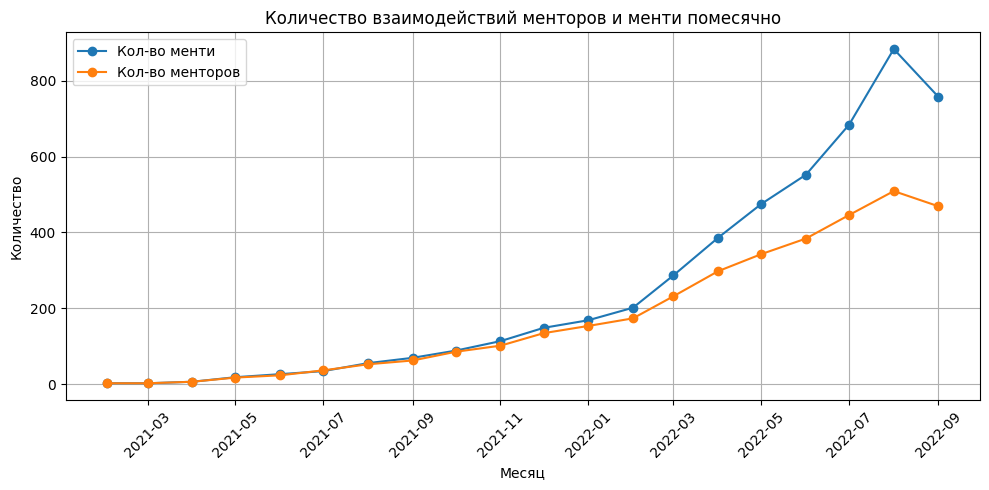

In [ ]:
df = pd.read_sql(sql, engine)

#Рисуем линейную диаграмму
plt.figure(figsize=(10, 5))
plt.plot(df['session_month'], df['mentee_cnt'], marker='o', label='Кол-во менти')
plt.plot(df['session_month'], df['mentor_cnt'], marker='o', label='Кол-во менторов')
plt.xlabel('Mесяц')
plt.ylabel('Количество')
plt.title('Количество взаимодействий менторов и менти помесячно')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Количество пользователей прирастает от месяца к месяцу. Но в сентябре количество менти и менторов, принимающих участие в сессиях меньше, чем в августе.
Проверка полноты данных за сентябрь, смотрим дату последней сессии:

In [ ]:
sql = '''
SELECT  max(session_date_time) as max_date
FROM    sessions s
                '''

select(sql)

,max_date
0,2022-09-15


Снижение кол-ва участников в сентябре не является ухудшением. Данные предоставлены за неполный месяц.

#### Вопрос №2. Сколько на платформе менторов и менти, которые еще не приняли участие ни в одной встрече? Учитывайте тех пользователей, кто ни разу не назначал себе встречи. Почему они не принимают участие во встречах? Какие гипотезы можно проверить?

In [ ]:
sql = '''
SELECT
    (SELECT COUNT(*)
     FROM users u
     WHERE role = 'mentor'
       AND NOT EXISTS (
           SELECT mentor_id
           FROM sessions s
           WHERE s.mentor_id = u.user_id
       )
    ) AS mentor_quantity,
    (SELECT COUNT(*)
     FROM users u
     WHERE role = 'mentee'
       AND NOT EXISTS (
           SELECT mentee_id
           FROM sessions s
           WHERE s.mentee_id = u.user_id
       )
    ) AS mentee_quantity
                '''

print('Количество менти, которые не приняли участие ни в одной сессии: ', select(sql)['mentee_quantity'].loc[select(sql).index[0]])

print('Количество менторов, которые не приняли участие ни в одной сессии: ', select(sql)['mentor_quantity'].loc[select(sql).index[0]])

Количество менти, которые не приняли участие ни в одной сессии:  662
Количество менторов, которые не приняли участие ни в одной сессии:  0


Нет менторов, которые не принимают участие в сессиях, поэтому рассмотрим только менти. Гипотезы:
- Недостаток менторов для всех менти, особенно с марта 2022
- Возможно, доступное время менторов не совпадает с доступным временем менти.
- В некоторых регионах активность менти ниже, чем в других.
- В некоторых направлениях менторства активность менти ниже, чем в других.

Рассмотрим 2 последние гипотезы, в связи с ограниченностью данных

In [ ]:
# Менти, которые не приняли участие, по регионам
sql = '''
SELECT r.name AS city_name, COUNT(u.user_id) AS mentee_count
FROM users u
JOIN region r ON u.region_id = r.id
LEFT JOIN sessions s ON u.user_id = s.mentee_id
WHERE u.role = 'mentee' AND s.mentee_id IS NULL
GROUP BY r.name
ORDER BY mentee_count DESC
                '''
select(sql)

,city_name,mentee_count
0,г Москва,272
1,Ростовская обл,71
2,г Санкт-Петербург,70
3,Ленинградская обл,49
4,Краснодарский край,49
5,Московская обл,42
6,Нижегородская обл,34
7,Другое,29
8,Новосибирская обл,19
9,Омская обл,15


В Москве самое большое кол-во таких пользователей, но посмотрим на долю от общего количества менти так же по регионам:

In [ ]:
sql = '''
WITH total_mentees_by_region AS (
    SELECT r.name AS city_name, COUNT(u.user_id) AS total_mentee_count
    FROM users u
    JOIN region r ON u.region_id = r.id
    WHERE u.role = 'mentee'
    GROUP BY r.name
),
inactive_mentees_by_region AS (
    SELECT r.name AS city_name, COUNT(u.user_id) AS inactive_mentee_count
    FROM users u
    JOIN region r ON u.region_id = r.id
    LEFT JOIN sessions s ON u.user_id = s.mentee_id
    WHERE u.role = 'mentee' AND s.mentee_id IS NULL
    GROUP BY r.name
)
SELECT t.city_name, t.total_mentee_count,
  (COALESCE(i.inactive_mentee_count, 0) :: NUMERIC / t.total_mentee_count) AS inactive_mentee_percentage
FROM total_mentees_by_region t
LEFT JOIN inactive_mentees_by_region i ON t.city_name = i.city_name
ORDER BY t.total_mentee_count DESC
                '''
select(sql)

,city_name,total_mentee_count,inactive_mentee_percentage
0,г Москва,1016,0.267717
1,г Санкт-Петербург,254,0.275591
2,Ростовская обл,243,0.292181
3,Краснодарский край,200,0.245000
4,Ленинградская обл,196,0.250000
5,Московская обл,157,0.267516
6,Другое,130,0.223077
7,Нижегородская обл,121,0.280992
8,Новосибирская обл,79,0.240506
9,Омская обл,45,0.333333


In [ ]:
#статистические метрики
select(sql)['inactive_mentee_percentage'].describe()

count    15.000000
mean      0.283849
std       0.101403
min       0.114286
25%       0.242753
50%       0.267717
75%       0.288948
max       0.500000
Name: inactive_mentee_percentage, dtype: float64

Процент московских менти, не участвующих в сессиях, близок к среднему значению и равен медианному, несмотря на их большое количество. Более 50% от всех регионов имеют большее значение данной метрики. Нельзя однозначно заявить о влиянии региона на прохождение сессий.

#### Вопрос №3.  Сколько у каждого ментора в среднем успешных сессий в неделю по месяцам? Как меняется частота встреч  в неделю от месяца к месяцу?
Определите ТОП-5 менторов с самым большим числом сессий за последний полный месяц.

In [ ]:
#Сколько у каждого ментора в среднем сессий в неделю по месяцам
sql = '''
WITH month_week_table AS (
    SELECT mentor_id,
    date_trunc('month', session_date_time) AS session_month,
    EXTRACT(week FROM session_date_time) AS n_week,
    COUNT(session_id) AS session_per_week
    FROM sessions
    WHERE session_status = 'finished'
    GROUP BY mentor_id,
             session_month,
             n_week
)
SELECT mentor_id,
session_month::date,
AVG(session_per_week)::int AS avg_session_per_week
FROM month_week_table
GROUP BY mentor_id,
         session_month
ORDER BY avg_session_per_week DESC;
                '''

select(sql).head()

,mentor_id,session_month,avg_session_per_week
0,3802,2022-09-01,15
1,772,2022-09-01,10
2,3105,2022-09-01,8
3,4123,2022-09-01,8
4,3347,2022-09-01,7


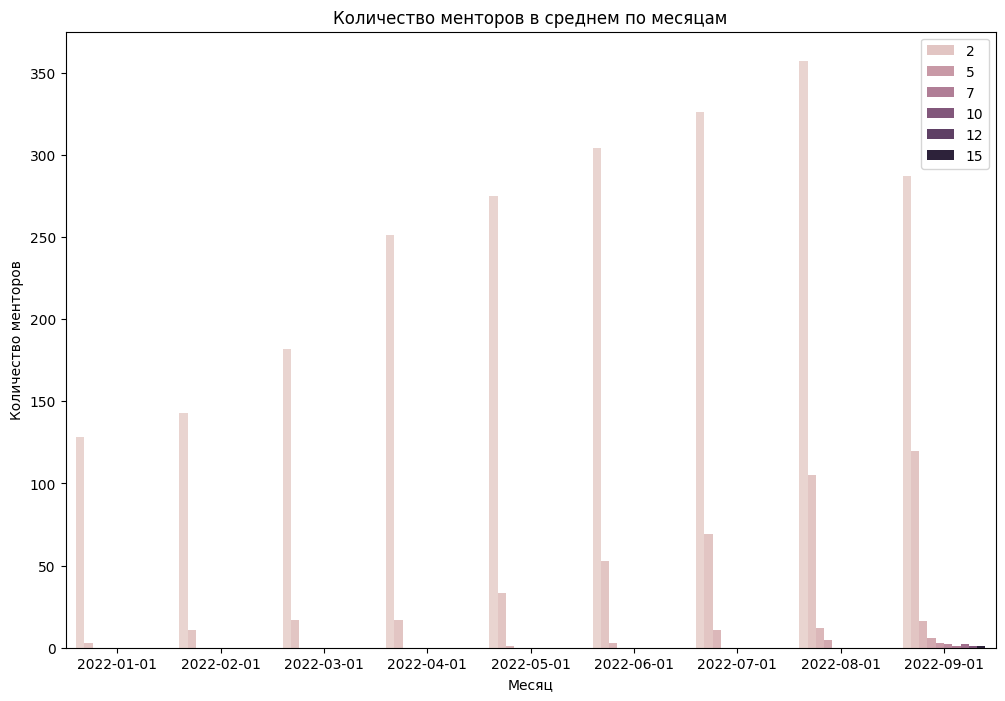

In [ ]:
#Как меняется частота встреч в неделю от месяца к месяцу?
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(data=(select(sql).astype({'session_month' : 'datetime64[ns]'})
                  .query("session_month >= '2022-01-01'")
                  .groupby(['session_month', 'avg_session_per_week'])
                  .agg(mentor_quantity = ('mentor_id', 'nunique'))
                  .reset_index()),
            x="session_month", y="mentor_quantity",
            hue="avg_session_per_week")
plt.xlabel('Месяц')
plt.ylabel('Количество менторов')
plt.title('Количество менторов в среднем по месяцам')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

С мая часть менторов стали проводить в среднем более 2 сессий в неделю, в дальнейших месяцах среднее количество проведенных сессий растет, в сентябре этот показатель достиг > 7

In [ ]:
#ТОП-5 менторов с самым большим числом сессий за последний полный месяц (август, сентябрь не полный)
sql = '''
WITH month_sessions AS (
    select mentor_id,
        COUNT(session_id) AS session_count
    from sessions
    where session_status = 'finished'
        AND session_date_time :: date BETWEEN '2022-08-01' AND '2022-08-31'
    GROUP by mentor_id
)
select  mentor_id,
    session_count
from month_sessions
ORDER by session_count DESC
LIMIT 5
                '''
select(sql)

,mentor_id,session_count
0,2192,11
1,328,9
2,1903,9
3,2850,8
4,4015,8


#### Вопрос №4. Сколько времени в среднем проходит между менторскими встречами у одного менти? Ментора?

In [ ]:
#Менторы
sql = '''
with next_session_dt as (
	select mentor_id,
	    session_date_time,
	    LEAD(session_date_time) OVER (PARTITION BY mentor_id ORDER BY session_date_time) AS next_session_date,
	    ROW_NUMBER() OVER (PARTITION BY mentor_id ORDER BY session_date_time) AS session_number
	from sessions s
  )
select *,
next_session_date-session_date_time as diff_date,
date_part('day', next_session_date-session_date_time) :: int as diff_day,
(next_session_date-session_date_time)/3600 as diff_hours
from next_session_dt
where session_number=1
'''
select(sql).head()

,mentor_id,session_date_time,next_session_date,session_number,diff_date,diff_day,diff_hours
0,7,2022-04-21,2022-05-21,1,30 days,30,0 days 00:12:00
1,15,2022-05-09,2022-05-16,1,7 days,7,0 days 00:02:48
2,16,2022-06-22,2022-06-22,1,0 days,0,0 days 00:00:00
3,26,2021-10-30,2021-11-22,1,23 days,23,0 days 00:09:12
4,27,2021-07-23,2021-08-09,1,17 days,17,0 days 00:06:48


In [ ]:
select(sql)['diff_date'].describe()

count                           623
mean     46 days 19:08:45.842696629
std      57 days 00:26:19.526924630
min                 0 days 00:00:00
25%                 7 days 00:00:00
50%                25 days 00:00:00
75%                62 days 00:00:00
max               326 days 00:00:00
Name: diff_date, dtype: object

Среднее и медианное значения показывают, что встречи в среднем происходят каждые полтора месяца, но половина встреч происходит с интервалом менее месяца.
Максимальное значение - 326 дней, можно посмотреть, у каких менторов низкая активность.



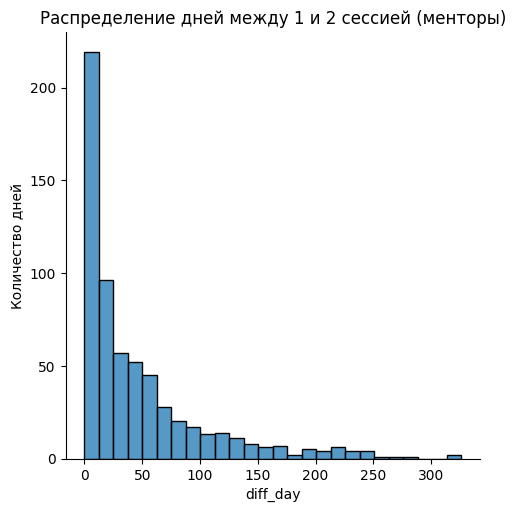

In [ ]:
#Диаграмма распределения
sns.displot(data=select(sql), x="diff_day")
plt.title('Распределение дней между 1 и 2 сессией (менторы)')
plt.ylabel('Количество дней')
plt.show()

In [ ]:
#Менти
sql = '''
with next_session_dt as (
	select mentee_id,
	    session_date_time,
	    LEAD(session_date_time) OVER (PARTITION BY mentee_id ORDER BY session_date_time) AS next_session_date,
	    ROW_NUMBER() OVER (PARTITION BY mentee_id ORDER BY session_date_time) AS session_number
	from sessions s
  )
select *,
next_session_date-session_date_time as diff_date,
date_part('day', next_session_date-session_date_time) :: int as diff_day,
(next_session_date-session_date_time)/3600 as diff_hours
from next_session_dt
where session_number=1
'''
select(sql).head()

,mentee_id,session_date_time,next_session_date,session_number,diff_date,diff_day,diff_hours
0,1,2021-09-02,2022-02-17,1,168 days,168.0,0 days 01:07:12
1,5,2022-06-03,2022-07-22,1,49 days,49.0,0 days 00:19:36
2,6,2022-03-07,2022-08-27,1,173 days,173.0,0 days 01:09:12
3,13,2022-04-05,2022-09-05,1,153 days,153.0,0 days 01:01:12
4,18,2022-04-22,2022-06-27,1,66 days,66.0,0 days 00:26:24


In [ ]:
select(sql)['diff_date'].describe()

count                          1497
mean     74 days 13:18:23.807615230
std      82 days 02:28:53.495786511
min                 0 days 00:00:00
25%                16 days 00:00:00
50%                46 days 00:00:00
75%               107 days 00:00:00
max               509 days 00:00:00
Name: diff_date, dtype: object

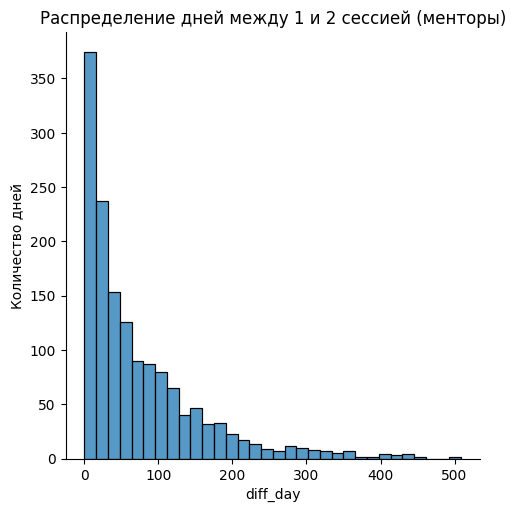

In [ ]:
#Диаграмма распределения для менти
sns.displot(data=select(sql), x="diff_day")
plt.title('Распределение дней между 1 и 2 сессией (менторы)')
plt.ylabel('Количество дней')
plt.show()

Половина сессий у менти проходит в интервале 46 дней. Как среднее значение дней у менторов.

#### Вопрос №5. Сколько сессий по каждому направлению менторства в месяц обычно отменяется? Как меняется доля отмененных сессий помесячно?

In [ ]:
sql = '''
with canceled_sessions as (
    select mentor_domain_id,
        DATE_TRUNC('month', session_date_time) :: date as session_month,
        COUNT(*) as canceled_count
    from sessions
    where session_status = 'canceled'
    GROUP by mentor_domain_id,
        session_month
),
total_sessions as (
    select mentor_domain_id,
        DATE_TRUNC('month', session_date_time) :: date as session_month,
        COUNT(*) AS total_count
    from sessions
    group by mentor_domain_id,
        session_month
)
select d.name as domain_name,
    t.session_month,
    t.total_count,
    ROUND((COALESCE(c.canceled_count, 0) * 100.0) / t.total_count, 2) as canceled_percent
from total_sessions t
left join canceled_sessions c ON t.mentor_domain_id = c.mentor_domain_id AND t.session_month = c.session_month
join domain d on t.mentor_domain_id = d.id
order by t.session_month, d.name
                '''
#Тут можно посмотреть количество и долю отмен по каждому направлению

select(sql)

,domain_name,session_month,total_count,canceled_percent
0,Python для аналитики данных,2021-02-01,2,0.00
1,SQL,2021-02-01,1,0.00
2,AB тестирование,2021-03-01,1,0.00
3,DS,2021-03-01,1,0.00
4,Машинное обучение,2021-03-01,1,0.00
...,...,...,...,...
123,Python для аналитики данных,2022-09-01,262,17.56
124,SQL,2022-09-01,171,15.79
125,Визуализация данных,2022-09-01,99,16.16
126,Машинное обучение,2022-09-01,165,19.39


In [ ]:
#Без разделения на направления
sql = ''' select DATE_TRUNC('month', session_date_time) :: date as session_month,
    COUNT(session_id) as total_count,
    COUNT(session_id) filter (where session_status = 'canceled') as canceled_count,
    ROUND((COUNT(session_id) filter (where session_status = 'canceled') * 100.0) / COUNT(session_id), 2) as canceled_percent
from sessions
group by session_month
order by session_month
'''
select(sql)

,session_month,total_count,canceled_count,canceled_percent
0,2021-02-01,3,0,0.00
1,2021-03-01,3,0,0.00
2,2021-04-01,7,2,28.57
3,2021-05-01,19,4,21.05
4,2021-06-01,27,4,14.81
5,2021-07-01,37,7,18.92
6,2021-08-01,59,6,10.17
7,2021-09-01,71,9,12.68
8,2021-10-01,101,11,10.89
9,2021-11-01,119,24,20.17


In [ ]:
select(sql)['canceled_percent'].describe()

count    20.000000
mean     15.164000
std       6.512833
min       0.000000
25%      13.167500
50%      16.230000
75%      18.315000
max      28.570000
Name: canceled_percent, dtype: float64

в среднем около 15% всех сессий были отменены. В апреле самая высокая доля отмененных сессий - около 29%. Доля отмененных сессий в интервале от 9% до 22% находится в норме, т.е. все месяцы держат стабильное значение отмен, кроме апреля.

#### Вопрос №6. В какой день недели последнего полного месяца прошло больше всего встреч? Определите самый загруженный день недели для каждого направления менторства. В результатах выведите тип направления, день недели и количество встреч.

In [ ]:
sql = '''
with session_per_week_day as (
    select d."name" domain_name,
           to_char(s.session_date_time, 'day') AS day_of_week,
           count(session_id) session_quantity
    from sessions s
    join domain d on s.mentor_domain_id = d.id
    where session_date_time :: date BETWEEN '2022-08-01' AND '2022-08-31'
    group by domain_name,
            day_of_week
),
rnk_sessions as (
    select *,
        DENSE_RANK() over (partition by domain_name order by session_quantity DESC) as rnk
    from session_per_week_day
)
select domain_name,
    day_of_week,
    session_quantity
from rnk_sessions
where rnk = 1
order by session_quantity desc
'''
select(sql)

,domain_name,day_of_week,session_quantity
0,SQL,monday,47
1,Машинное обучение,tuesday,42
2,DS,wednesday,40
3,Python для аналитики данных,wednesday,40
4,Продуктовая аналитика,sunday,35
5,Визуализация данных,wednesday,29
6,AB тестирование,tuesday,27


Самый загруженный день - среда (109 сессий)

### Задание №3:
Предложите Ивану точки роста продукта на основании
данных, которые вы получили в прошлых заданиях.

1. Оптимизация распределения сессий по дням недели, чтобы была равномерная нагрузка на менторов, в определении самых загруженных дней нет четверга, пятницы и субботы.
2. Попытаться снизить % отмененных сессий (в среднем 15%).
3. Уменьшить время ожидания между 1 и 2 сессиями, в среднем менторы проводят 2-ю встречу через 46 дней. Есть ТОП-5 менторов, которые провели от 8 до 11 сессий за месяц.
4. 662 менти не приняли участие ни в одной встрече, повысить активность этих пользователей.



### Задание №4*:
Спрогнозируйте, сколько новых менторов нужно найти, если
в следующем месяце количество активных менти увеличится
на 500 человек. Учитывайте, что занятость новых менторов
будет такой же, как у текущих.

In [ ]:
sql = '''
with active_users as (
    select mentor_id,
        mentee_id
    from sessions
    where session_status = 'finished'
),
cnt_mentees_and_mentors as (
    select COUNT(distinct mentor_id) as active_mentors,
       COUNT(distinct mentee_id)  as active_mentees
       from active_users
)
select active_mentors,
    active_mentees,
    --Среднее количество менти на одного ментора - текущая нагрузка
    active_mentees / active_mentors as avg_mentees_per_mentor,
    --Количество новых менторов
    500 / (active_mentees / active_mentors) as needed_new_mentors
from cnt_mentees_and_mentors
                '''

select(sql)

,active_mentors,active_mentees,avg_mentees_per_mentor,needed_new_mentors
0,623,1776,2,250


In [ ]:
print("Потребуется найти менторов: ", select(sql)['needed_new_mentors'].loc[select(sql).index[0]])

Потребуется найти менторов:  250
